# Machine Learning Online Class - Exercise 3 |  Part 1: One-vs-all

## Functions

In [11]:
function g = sigmoid(z)
%SIGMOID Compute sigmoid function
%   g = SIGMOID(z) computes the sigmoid of z.

% You need to return the following variables correctly 
g = zeros(size(z));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the sigmoid of each value of z (z can be a matrix,
%               vector or scalar).


g = 1 ./ (1 + e .^ -z);


% =============================================================

end

In [9]:
function [J, grad] = costFunction(theta, X, y)
%COSTFUNCTION Compute cost and gradient for logistic regression
%   J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
%   parameter for logistic regression and the gradient of the cost
%   w.r.t. to the parameters.

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;
grad = zeros(size(theta));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the cost of a particular choice of theta.
%               You should set J to the cost.
%               Compute the partial derivatives and set grad to the partial
%               derivatives of the cost w.r.t. each parameter in theta
%
% Note: grad should have the same dimensions as theta
%

h0 = sigmoid(X*theta);

J = (1/m)*sum(-y.*log(h0) - (1-y).*log(1-h0));
grad = (1/m)*(X'*(h0-y));






% =============================================================

end

In [1]:
function [J, grad] = costFunctionReg(theta, X, y, lambda)
%COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization
%   J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
%   theta as the parameter for regularized logistic regression and the
%   gradient of the cost w.r.t. to the parameters. 

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;
grad = zeros(size(theta));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the cost of a particular choice of theta.
%               You should set J to the cost.
%               Compute the partial derivatives and set grad to the partial
%               derivatives of the cost w.r.t. each parameter in theta


[J, grad] = costFunction(theta, X, y);
penalize = sum(theta(2:end) .^ 2);
J = J + lambda/(2*m) * penalize;
grad(2:end) = grad(2:end) + (lambda/m)*theta(2:end);
% =============================================================

end

In [2]:
function [h, display_array] = displayData(X, example_width)
%DISPLAYDATA Display 2D data in a nice grid
%   [h, display_array] = DISPLAYDATA(X, example_width) displays 2D data
%   stored in X in a nice grid. It returns the figure handle h and the 
%   displayed array if requested.

% Set example_width automatically if not passed in
if ~exist('example_width', 'var') || isempty(example_width) 
	example_width = round(sqrt(size(X, 2)));
end

% Gray Image
colormap(gray);

% Compute rows, cols
[m n] = size(X);
example_height = (n / example_width);

% Compute number of items to display
display_rows = floor(sqrt(m));
display_cols = ceil(m / display_rows);

% Between images padding
pad = 1;

% Setup blank display
display_array = - ones(pad + display_rows * (example_height + pad), ...
                       pad + display_cols * (example_width + pad));

% Copy each example into a patch on the display array
curr_ex = 1;
for j = 1:display_rows
    for i = 1:display_cols
        if curr_ex > m, 
            break; 
        end
        % Copy the patch
        % Get the max value of the patch
        max_val = max(abs(X(curr_ex, :)));
        display_array(pad + (j - 1) * (example_height + pad) + (1:example_height), ...
                      pad + (i - 1) * (example_width + pad) + (1:example_width)) = ...
                        reshape(X(curr_ex, :), example_height, example_width) / max_val;
        curr_ex = curr_ex + 1;
    end
    if curr_ex > m, 
        break; 
    end
end

% Display Image
h = imagesc(display_array, [-1 1]);

% Do not show axis
axis image off

drawnow;

end

In [7]:
function [J, grad] = lrCostFunction(theta, X, y, lambda)
%LRCOSTFUNCTION Compute cost and gradient for logistic regression with 
%regularization
%   J = LRCOSTFUNCTION(theta, X, y, lambda) computes the cost of using
%   theta as the parameter for regularized logistic regression and the
%   gradient of the cost w.r.t. to the parameters. 

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;
grad = zeros(size(theta));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the cost of a particular choice of theta.
%               You should set J to the cost.
%               Compute the partial derivatives and set grad to the partial
%               derivatives of the cost w.r.t. each parameter in theta
%
% Hint: The computation of the cost function and gradients can be
%       efficiently vectorized. For example, consider the computation
%
%           sigmoid(X * theta)
%
%       Each row of the resulting matrix will contain the value of the
%       prediction for that example. You can make use of this to vectorize
%       the cost function and gradient computations. 
%
% Hint: When computing the gradient of the regularized cost function, 
%       there're many possible vectorized solutions, but one solution
%       looks like:
%           grad = (unregularized gradient for logistic regression)
%           temp = theta; 
%           temp(1) = 0;   % because we don't add anything for j = 0  
%           grad = grad + YOUR_CODE_HERE (using the temp variable)
%


[J, grad] = costFunctionReg(theta, X, y, lambda);



% =============================================================

grad = grad(:);

end

In [19]:
function [all_theta] = oneVsAll(X, y, num_labels, lambda)
%ONEVSALL trains multiple logistic regression classifiers and returns all
%the classifiers in a matrix all_theta, where the i-th row of all_theta 
%corresponds to the classifier for label i
%   [all_theta] = ONEVSALL(X, y, num_labels, lambda) trains num_labels
%   logistic regression classifiers and returns each of these classifiers
%   in a matrix all_theta, where the i-th row of all_theta corresponds 
%   to the classifier for label i

% Some useful variables
m = size(X, 1);
n = size(X, 2);

% You need to return the following variables correctly 
all_theta = zeros(num_labels, n + 1);

% Add ones to the X data matrix
X = [ones(m, 1) X];

% ====================== YOUR CODE HERE ======================
%
% Hint: theta(:) will return a column vector.
%
% Hint: You can use y == c to obtain a vector of 1's and 0's that tell you
%       whether the ground truth is true/false for this class.
%
%
%       fmincg works similarly to fminunc, but is more efficient when we
%       are dealing with large number of parameters.
%
% Example Code for fmincg:
%
%     % Set Initial theta
%     initial_theta = zeros(n + 1, 1);
%     
%     % Set options for fminunc
%     options = optimset('GradObj', 'on', 'MaxIter', 50);
% 
%     % Run fmincg to obtain the optimal theta
%     % This function will return theta and the cost 
%     [theta] = ...
%         fmincg (@(t)(lrCostFunction(t, X, (y == c), lambda)), ...
%                 initial_theta, options);
%




    for c = 1:num_labels
        options = optimset('GradObj', 'on', 'MaxIter', 50);
        all_theta(c, :) = fmincg (@(t)(lrCostFunction(t, X, (y == c), lambda)), zeros(n + 1, 1), options);
    end
end

In [22]:
function [X, fX, i] = fmincg(f, X, options, P1, P2, P3, P4, P5)
% Minimize a continuous differentialble multivariate function. Starting point
% is given by "X" (D by 1), and the function named in the string "f", must
% return a function value and a vector of partial derivatives. The Polack-
% Ribiere flavour of conjugate gradients is used to compute search directions,
% and a line search using quadratic and cubic polynomial approximations and the
% Wolfe-Powell stopping criteria is used together with the slope ratio method
% for guessing initial step sizes. Additionally a bunch of checks are made to
% make sure that exploration is taking place and that extrapolation will not
% be unboundedly large. The "length" gives the length of the run: if it is
% positive, it gives the maximum number of line searches, if negative its
% absolute gives the maximum allowed number of function evaluations. You can
% (optionally) give "length" a second component, which will indicate the
% reduction in function value to be expected in the first line-search (defaults
% to 1.0). The function returns when either its length is up, or if no further
% progress can be made (ie, we are at a minimum, or so close that due to
% numerical problems, we cannot get any closer). If the function terminates
% within a few iterations, it could be an indication that the function value
% and derivatives are not consistent (ie, there may be a bug in the
% implementation of your "f" function). The function returns the found
% solution "X", a vector of function values "fX" indicating the progress made
% and "i" the number of iterations (line searches or function evaluations,
% depending on the sign of "length") used.
%
% Usage: [X, fX, i] = fmincg(f, X, options, P1, P2, P3, P4, P5)
%
% See also: checkgrad 
%
% Copyright (C) 2001 and 2002 by Carl Edward Rasmussen. Date 2002-02-13
%
%
% (C) Copyright 1999, 2000 & 2001, Carl Edward Rasmussen
% 
% Permission is granted for anyone to copy, use, or modify these
% programs and accompanying documents for purposes of research or
% education, provided this copyright notice is retained, and note is
% made of any changes that have been made.
% 
% These programs and documents are distributed without any warranty,
% express or implied.  As the programs were written for research
% purposes only, they have not been tested to the degree that would be
% advisable in any important application.  All use of these programs is
% entirely at the user's own risk.
%
% [ml-class] Changes Made:
% 1) Function name and argument specifications
% 2) Output display
%

% Read options
if exist('options', 'var') && ~isempty(options) && isfield(options, 'MaxIter')
    length = options.MaxIter;
else
    length = 100;
end


RHO = 0.01;                            % a bunch of constants for line searches
SIG = 0.5;       % RHO and SIG are the constants in the Wolfe-Powell conditions
INT = 0.1;    % don't reevaluate within 0.1 of the limit of the current bracket
EXT = 3.0;                    % extrapolate maximum 3 times the current bracket
MAX = 20;                         % max 20 function evaluations per line search
RATIO = 100;                                      % maximum allowed slope ratio

argstr = ['feval(f, X'];                      % compose string used to call function
for i = 1:(nargin - 3)
  argstr = [argstr, ',P', int2str(i)];
end
argstr = [argstr, ')'];

if max(size(length)) == 2, red=length(2); length=length(1); else red=1; end
S=['Iteration '];

i = 0;                                            % zero the run length counter
ls_failed = 0;                             % no previous line search has failed
fX = [];
[f1 df1] = eval(argstr);                      % get function value and gradient
i = i + (length<0);                                            % count epochs?!
s = -df1;                                        % search direction is steepest
d1 = -s'*s;                                                 % this is the slope
z1 = red/(1-d1);                                  % initial step is red/(|s|+1)

while i < abs(length)                                      % while not finished
  i = i + (length>0);                                      % count iterations?!

  X0 = X; f0 = f1; df0 = df1;                   % make a copy of current values
  X = X + z1*s;                                             % begin line search
  [f2 df2] = eval(argstr);
  i = i + (length<0);                                          % count epochs?!
  d2 = df2'*s;
  f3 = f1; d3 = d1; z3 = -z1;             % initialize point 3 equal to point 1
  if length>0, M = MAX; else M = min(MAX, -length-i); end
  success = 0; limit = -1;                     % initialize quanteties
  while 1
    while ((f2 > f1+z1*RHO*d1) || (d2 > -SIG*d1)) && (M > 0) 
      limit = z1;                                         % tighten the bracket
      if f2 > f1
        z2 = z3 - (0.5*d3*z3*z3)/(d3*z3+f2-f3);                 % quadratic fit
      else
        A = 6*(f2-f3)/z3+3*(d2+d3);                                 % cubic fit
        B = 3*(f3-f2)-z3*(d3+2*d2);
        z2 = (sqrt(B*B-A*d2*z3*z3)-B)/A;       % numerical error possible - ok!
      end
      if isnan(z2) || isinf(z2)
        z2 = z3/2;                  % if we had a numerical problem then bisect
      end
      z2 = max(min(z2, INT*z3),(1-INT)*z3);  % don't accept too close to limits
      z1 = z1 + z2;                                           % update the step
      X = X + z2*s;
      [f2 df2] = eval(argstr);
      M = M - 1; i = i + (length<0);                           % count epochs?!
      d2 = df2'*s;
      z3 = z3-z2;                    % z3 is now relative to the location of z2
    end
    if f2 > f1+z1*RHO*d1 || d2 > -SIG*d1
      break;                                                % this is a failure
    elseif d2 > SIG*d1
      success = 1; break;                                             % success
    elseif M == 0
      break;                                                          % failure
    end
    A = 6*(f2-f3)/z3+3*(d2+d3);                      % make cubic extrapolation
    B = 3*(f3-f2)-z3*(d3+2*d2);
    z2 = -d2*z3*z3/(B+sqrt(B*B-A*d2*z3*z3));        % num. error possible - ok!
    if ~isreal(z2) || isnan(z2) || isinf(z2) || z2 < 0 % num prob or wrong sign?
      if limit < -0.5                               % if we have no upper limit
        z2 = z1 * (EXT-1);                 % the extrapolate the maximum amount
      else
        z2 = (limit-z1)/2;                                   % otherwise bisect
      end
    elseif (limit > -0.5) && (z2+z1 > limit)         % extraplation beyond max?
      z2 = (limit-z1)/2;                                               % bisect
    elseif (limit < -0.5) && (z2+z1 > z1*EXT)       % extrapolation beyond limit
      z2 = z1*(EXT-1.0);                           % set to extrapolation limit
    elseif z2 < -z3*INT
      z2 = -z3*INT;
    elseif (limit > -0.5) && (z2 < (limit-z1)*(1.0-INT))  % too close to limit?
      z2 = (limit-z1)*(1.0-INT);
    end
    f3 = f2; d3 = d2; z3 = -z2;                  % set point 3 equal to point 2
    z1 = z1 + z2; X = X + z2*s;                      % update current estimates
    [f2 df2] = eval(argstr);
    M = M - 1; i = i + (length<0);                             % count epochs?!
    d2 = df2'*s;
  end                                                      % end of line search

  if success                                         % if line search succeeded
    f1 = f2; fX = [fX' f1]';
    fprintf('%s %4i | Cost: %4.6e\r', S, i, f1);
    s = (df2'*df2-df1'*df2)/(df1'*df1)*s - df2;      % Polack-Ribiere direction
    tmp = df1; df1 = df2; df2 = tmp;                         % swap derivatives
    d2 = df1'*s;
    if d2 > 0                                      % new slope must be negative
      s = -df1;                              % otherwise use steepest direction
      d2 = -s'*s;    
    end
    z1 = z1 * min(RATIO, d1/(d2-realmin));          % slope ratio but max RATIO
    d1 = d2;
    ls_failed = 0;                              % this line search did not fail
  else
    X = X0; f1 = f0; df1 = df0;  % restore point from before failed line search
    if ls_failed || i > abs(length)          % line search failed twice in a row
      break;                             % or we ran out of time, so we give up
    end
    tmp = df1; df1 = df2; df2 = tmp;                         % swap derivatives
    s = -df1;                                                    % try steepest
    d1 = -s'*s;
    z1 = 1/(1-d1);                     
    ls_failed = 1;                                    % this line search failed
  end
  if exist('OCTAVE_VERSION')
    fflush(stdout);
  end
end
fprintf('\n');
end

In [25]:
function p = predictOneVsAll(all_theta, X)
%PREDICT Predict the label for a trained one-vs-all classifier. The labels 
%are in the range 1..K, where K = size(all_theta, 1). 
%  p = PREDICTONEVSALL(all_theta, X) will return a vector of predictions
%  for each example in the matrix X. Note that X contains the examples in
%  rows. all_theta is a matrix where the i-th row is a trained logistic
%  regression theta vector for the i-th class. You should set p to a vector
%  of values from 1..K (e.g., p = [1; 3; 1; 2] predicts classes 1, 3, 1, 2
%  for 4 examples) 

m = size(X, 1);
num_labels = size(all_theta, 1);

% You need to return the following variables correctly 
p = zeros(size(X, 1), 1);

% Add ones to the X data matrix
X = [ones(m, 1) X];

% ====================== YOUR CODE HERE ======================
% Instructions: Complete the following code to make predictions using
%               your learned logistic regression parameters (one-vs-all).
%               You should set p to a vector of predictions (from 1 to
%               num_labels).
%
% Hint: This code can be done all vectorized using the max function.
%       In particular, the max function can also return the index of the 
%       max element, for more information see 'help max'. If your examples 
%       are in rows, then, you can use max(A, [], 2) to obtain the max 
%       for each row.
%       



[value, p] = max((X*all_theta'), [], 2);



% =========================================================================


end

## Initialization

In [3]:
clear ; close all; clc

## Load Data
### The first two columns contains the exam scores and the third column and ontains the label.

Loading and Visualizing Data ...


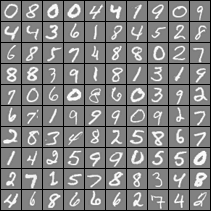

In [4]:


%% Setup the parameters you will use for this part of the exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
num_labels = 10;          % 10 labels, from 1 to 10
                          % (note that we have mapped "0" to label 10)

%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset.
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

load('../../data/handwritten_digits.mat');
m = size(X, 1);

% Randomly select 100 data points to display
rand_indices = randperm(m);
sel = X(rand_indices(1:100), :);

displayData(sel);

## Vectorize Logistic Regression
Test case for lrCostFunction


In [12]:
fprintf('\nTesting lrCostFunction() with regularization');

theta_t = [-2; -1; 1; 2];
X_t = [ones(5,1) reshape(1:15,5,3)/10];
y_t = ([1;0;1;0;1] >= 0.5);
lambda_t = 3;
[J grad] = lrCostFunction(theta_t, X_t, y_t, lambda_t);

fprintf('\nCost: %f\n', J);
fprintf('Expected cost: 2.534819\n');
fprintf('Gradients:\n');
fprintf(' %f \n', grad);
fprintf('Expected gradients:\n');
fprintf(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n');


Testing lrCostFunction() with regularization

Cost: 2.534819
Expected cost: 2.534819
Gradients:
 0.146561 
 -0.548558 
 0.724722 
 1.398003 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003
Testing lrCostFunction() with regularization


## One-vs-All Training

In [23]:
fprintf('\nTraining One-vs-All Logistic Regression...\n')

lambda = 0.1;
[all_theta] = oneVsAll(X, y, num_labels, lambda);


Training One-vs-All Logistic Regression...
Iteration    50 | Cost: 1.368970e-02
Iteration    50 | Cost: 5.725216e-02
Iteration    50 | Cost: 6.395865e-02
Iteration    50 | Cost: 3.659649e-02
Iteration    50 | Cost: 6.186841e-02
Iteration    50 | Cost: 2.187810e-02
Iteration    50 | Cost: 3.327560e-02
Iteration    50 | Cost: 8.464154e-02
Iteration    50 | Cost: 8.084051e-02
Iteration    50 | Cost: 9.860758e-03


### Predict for One-Vs-All

In [26]:
pred = predictOneVsAll(all_theta, X);
fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);


Training Set Accuracy: 95.160000
